In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']
plt.rcParams['axes.unicode_minus'] = False

Latitude: 1 deg = 110.574 km
Longitude: 1 deg = 111.320*cos(latitude) km

In [16]:
gps=pd.read_csv("830024_90.csv",encoding='BIG5')
print(gps.shape[0]-gps.count() )
gps.head()

Column1         0
Column2         0
Column3         0
Column4         0
Column5         0
Column6         0
Column7         0
Column8         0
Column9         0
Column10        0
Column11    11128
Column12        0
Column13        0
Column14      292
Column15        0
Column16        0
dtype: int64


,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13,Column14,Column15,Column16
0,7751-UX,90,1,189,↓,70,188925,2488970,120.4064,22.4993,NaN,2018/1/3 上午 08:54:31,7971,354.0,70,830024
1,7751-UX,90,3,28,↗,70,188966,2489014,120.4068,22.4997,NaN,2018/1/3 上午 08:55:31,7971,33.0,70,830024
2,7751-UX,90,0,259,↙,70,189809,2488723,120.4150,22.4971,NaN,2018/1/3 上午 08:58:01,7971,0.0,70,830024
3,7751-UX,90,0,259,↙,70,189809,2488723,120.4150,22.4971,NaN,2018/1/3 上午 08:58:31,7971,0.0,70,830024
4,7751-UX,90,0,191,↓,50,189495,2489876,120.4119,22.5075,NaN,2018/1/3 上午 09:01:58,107380,15.0,50,830024


In [23]:
s=gps[["Column10","Column9"]].copy()
s.columns=["緯度","經度"]
print (s.shape[0])
s.head()

11128


,緯度,經度
0,22.4993,120.4064
1,22.4997,120.4068
2,22.4971,120.4150
3,22.4971,120.4150
4,22.5075,120.4119


所有的gps資料

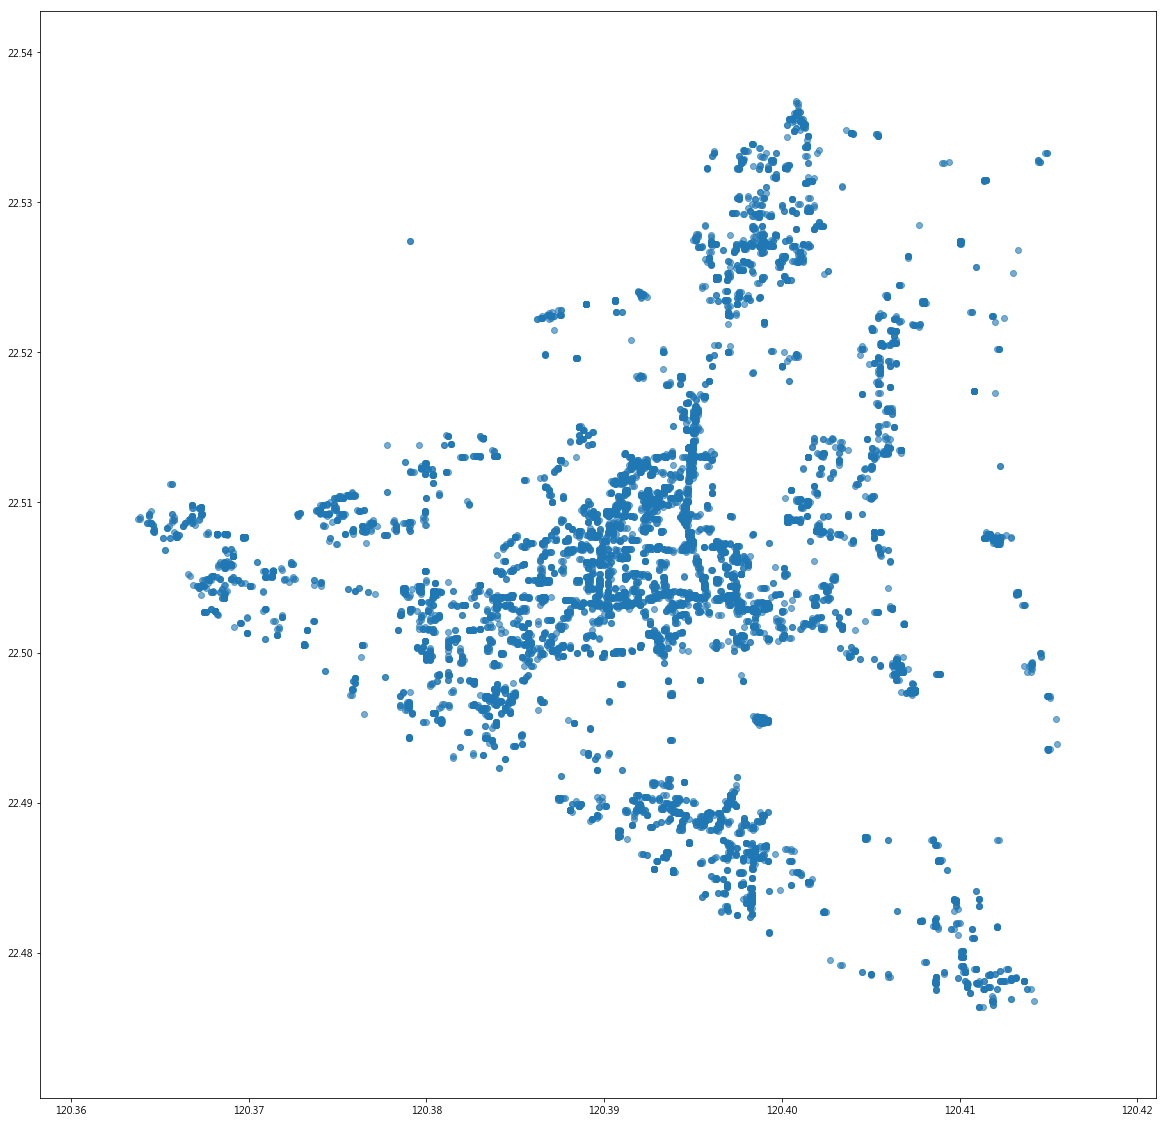

In [36]:
fig = plt.figure(figsize = (20,20))
plt.scatter(s['經度'],s['緯度'], alpha=0.6) 
plt.savefig('830024_所有路邊暫停位置圖.png', dpi=300)  

In [41]:
from sklearn import cluster, datasets, metrics
silhouette_avgs = []
ks = range(2,200)
for k in ks:
    print (k)
    kmeans_fit = cluster.KMeans(n_clusters = k,random_state=0).fit(s)
    cluster_labels = kmeans_fit.labels_
    silhouette_avg = metrics.silhouette_score(s, cluster_labels)
    silhouette_avgs.append(silhouette_avg)

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


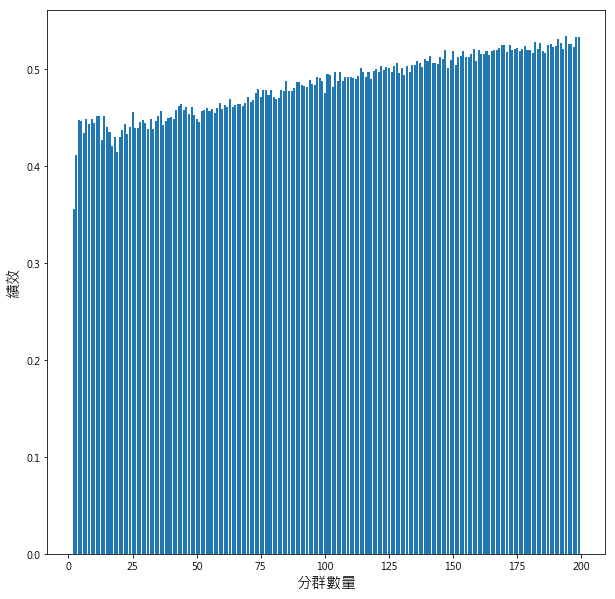

In [42]:
fig = plt.figure(figsize = (10,10))
plt.xlabel('分群數量',fontsize='15')
plt.ylabel('績效',fontsize='15')   
plt.bar(ks, silhouette_avgs)
plt.savefig('k_means_200.png', dpi=300)  
plt.show()

In [43]:
best_n_kemeans = silhouette_avgs.index(max(silhouette_avgs))
print( best_n_kemeans)

192


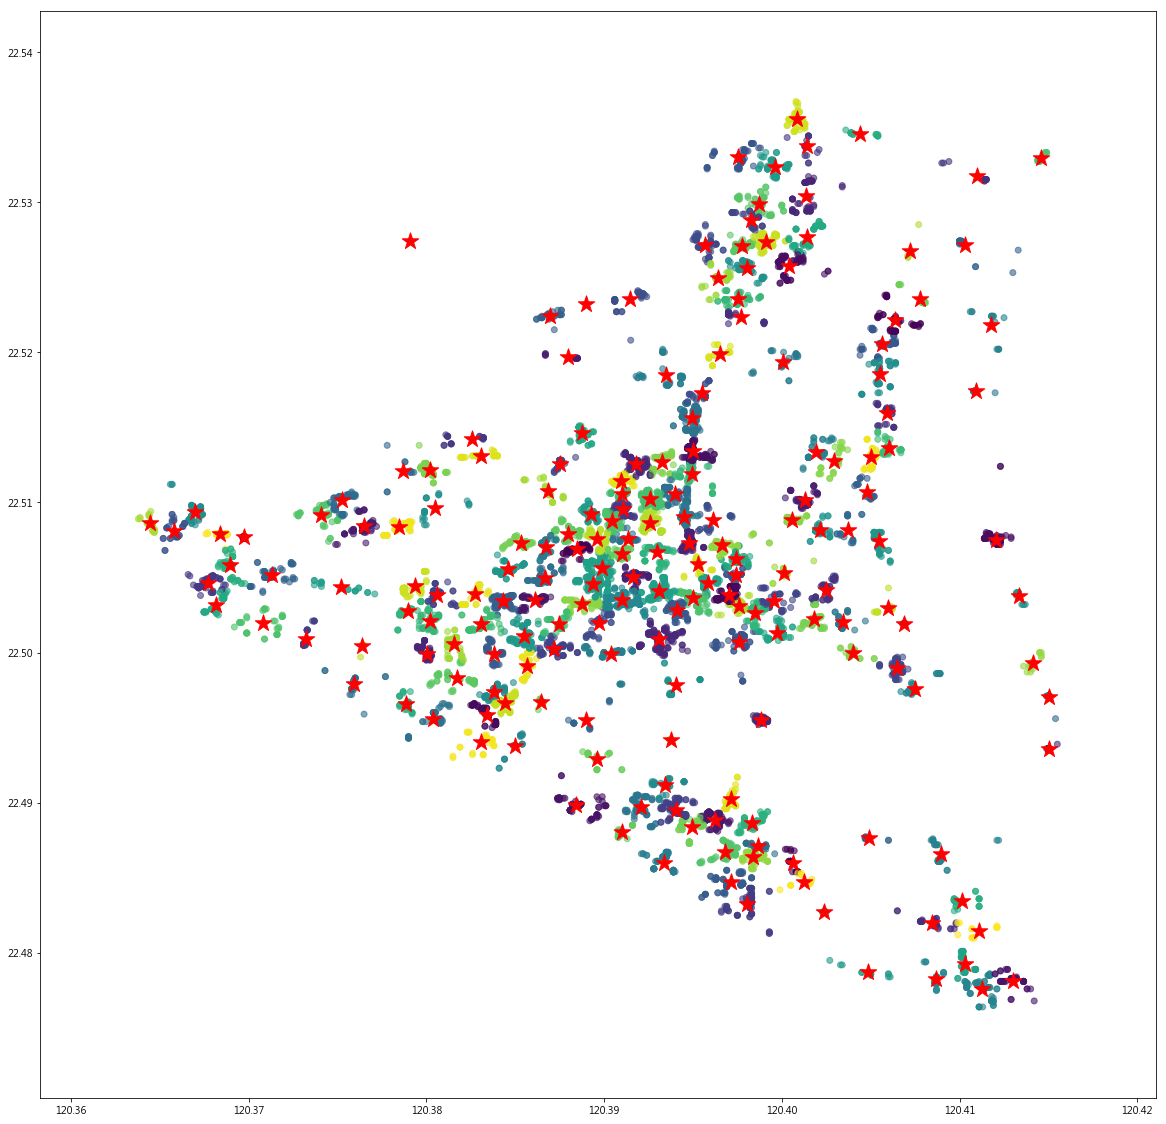

In [44]:
from sklearn.cluster import KMeans
clf = KMeans(n_clusters=best_n_kemeans,random_state=0 )
clf.fit(s)
clf.labels_
fig = plt.figure(figsize = (20,20))
plt.scatter(s['經度'],s['緯度'], alpha=0.6,c=clf.labels_) 
#print ( np.unique(clf.labels_)  )
centers = clf.cluster_centers_

for i in centers:
    plt.scatter(i[1],i[0], marker='*',c='r',s=300) 
plt.savefig('830024_所有客戶位置圖_192.png', dpi=300)  
#print (centers)

In [45]:
longitude =[]
latitude = []
for i in centers:
    latitude.append(i[0])
    longitude.append(i[1])

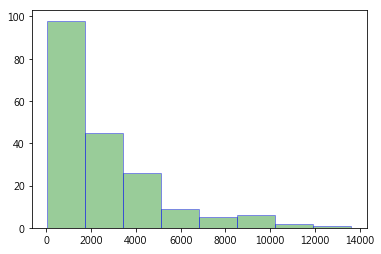

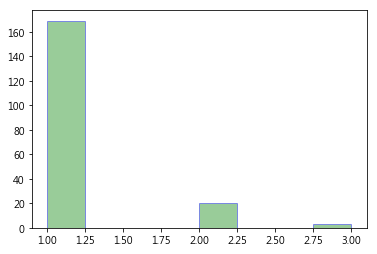

In [46]:
# acc第一季的平均包裹重量，採取累積數量前80% 0~3500公克之間的重量資料，平均數:1265,標準差:855
# 所有重量的平均數:：3029   標準差:3694 中位數:1534
weight = np.random.exponential(3029,best_n_kemeans)
#print (weight)
plt.hist(weight,bins=8,color='g',edgecolor='b',alpha=0.4)
plt.show()

weight_unit=[] 

for i in weight:
    if i < 5000:
        weight_unit.append(1)
    elif i >=5000 and i < 10000:
        weight_unit.append(2)
    elif i >=10000 and i <15000:
        weight_unit.append(3)
    else:
        weight_unit.append(4)

plt.hist(weight_unit,bins=8,color='g',edgecolor='b',alpha=0.4)
plt.show()

#print (weight_unit)


In [47]:
#2018年1/9號歷史資料
tt=pd.read_csv("PackageOnly.csv",encoding='BIG5')
tt["Column4"]=tt["Column4"].apply( lambda x : x[0:2]   )
print (tt.shape[0])
tt.head()

2169


,Column1,Column2,Column4,type
0,H4,6229000101574,下午,4.0
1,H4,82572900101474,下午,74.0
2,H4,47101383003174800000,下午,74.0
3,H4,47101383003174800000,上午,74.0
4,H4,55778424124874,下午,74.0


In [48]:
morn_success=tt[ (tt["Column1"]=='I4') & (tt["Column4"] =='上午') ]
morn_fail = tt[ (tt["Column1"]=='H4') & (tt["Column4"] =='上午') ]
after_success = tt[ (tt["Column1"]=='I4') & (tt["Column4"] =='下午') ]
after_fail = tt[ (tt["Column1"]=='H4') & (tt["Column4"] =='下午') ]


print ("morn_success: ",morn_success.shape[0])
print ("morn_fail: ",morn_fail.shape[0])
print ("after_success: ",after_success.shape[0])
print ("after_fail: ",after_fail.shape[0])


morn_success:  137
morn_fail:  62
after_success:  1412
after_fail:  558


In [62]:
mr=137/(137+62)
ar=1412/(558+1412)
print (mr,ar)

0.6884422110552764 0.716751269035533


830024 失敗/成功件數:40862/96855

In [64]:
import csv
with open('830024_192_kmeans.csv', 'w', newline='') as csvfile:
    # 以空白分隔欄位，建立 CSV 檔寫入器
    writer = csv.writer(csvfile, delimiter=',')
    writer.writerow(['號碼','郵局','緯度', '經度','重量','重量單位','一上P','一下P','二上P','二下P'
                     ,'三上P','三下P','四上P','四下P','五上P','五下P'])
    writer.writerow([0,1,22.501264,120.397632,"NaN","NaN","NaN","NaN","NaN","NaN","NaN","NaN","NaN","NaN","NaN","NaN"])
    for i in range(0,best_n_kemeans):
        writer.writerow([i+1,0,latitude[i], longitude[i],weight[i],weight_unit[i],np.random.normal(mr,0.1)
                        ,np.random.normal(ar,0.1),np.random.normal(mr,0.1)
                        ,np.random.normal(ar,0.1),np.random.normal(mr,0.1)
                        ,np.random.normal(ar,0.1),np.random.normal(mr,0.1)
                        ,np.random.normal(ar,0.1),np.random.normal(mr,0.1)
                        ,np.random.normal(ar,0.1)])

        
#臺灣投遞郵局：林園郵局 22.501264, 120.397632 

In [54]:
import random

#假設上午投遞成功和失敗信件數
morn_success_number = morn_success.shape[0]
morn_fail_number = morn_fail.shape[0]

#假設下午投遞成功和失敗信件數
after_success_number = after_success.shape[0]
after_fail_number = after_fail.shape[0]


total=['1' for i in range(morn_success_number) ]+['2' for i in range(morn_fail_number) ]+['3' for i in range(after_success_number) ]+['4' for i in range(after_fail_number) ]


#打散所有信件
random.shuffle(total)

customer=['a' for i in range(best_n_kemeans)]

#將每一筆信件隨機分給一個客戶
for i in total: 
    n=random.randint(0,best_n_kemeans-1)
    customer[n]+=i

morn=[]
after=[]

#計算每位客戶的上午投遞成功率和失敗率
for i in range(best_n_kemeans):
    if customer[i].count('1')+customer[i].count('2')==0:
        morn.append(0)
    else:
        morn.append(customer[i].count('1')/(customer[i].count('1')+customer[i].count('2') ))
        
    if customer[i].count('3')+customer[i].count('4') ==0:
        after.append(0)
    else:
        after.append(customer[i].count('3')/(customer[i].count('3')+customer[i].count('4') ))

#print (morn,'\n')
#print (after)
    

投遞率採取隨機分布